In [14]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2019-07-10 16:59:08--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 2607:f8b0:400e:c08::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   173MB/s    in 0.8s    

2019-07-10 16:59:09 (173 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]

--2019-07-10 16:59:16--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 2607:f8b0:400e:c09::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/z

In [0]:
import os
import zipfile


lzip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(lzip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()


In [16]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

train_horse_list = os.listdir(train_horse_dir)
train_human_list = os.listdir(train_human_dir)

print('Horses:', train_horse_list[:11] , 'Humans:', train_human_list[:11] , sep='\n')

Horses:
['horse43-8.png', 'horse27-4.png', 'horse45-9.png', 'horse10-4.png', 'horse26-6.png', 'horse39-5.png', 'horse12-4.png', 'horse47-7.png', 'horse14-9.png', 'horse35-0.png', 'horse22-6.png']
Humans:
['human07-03.png', 'human14-20.png', 'human04-23.png', 'human16-00.png', 'human10-03.png', 'human09-01.png', 'human08-27.png', 'human03-03.png', 'human10-22.png', 'human12-09.png', 'human06-11.png']


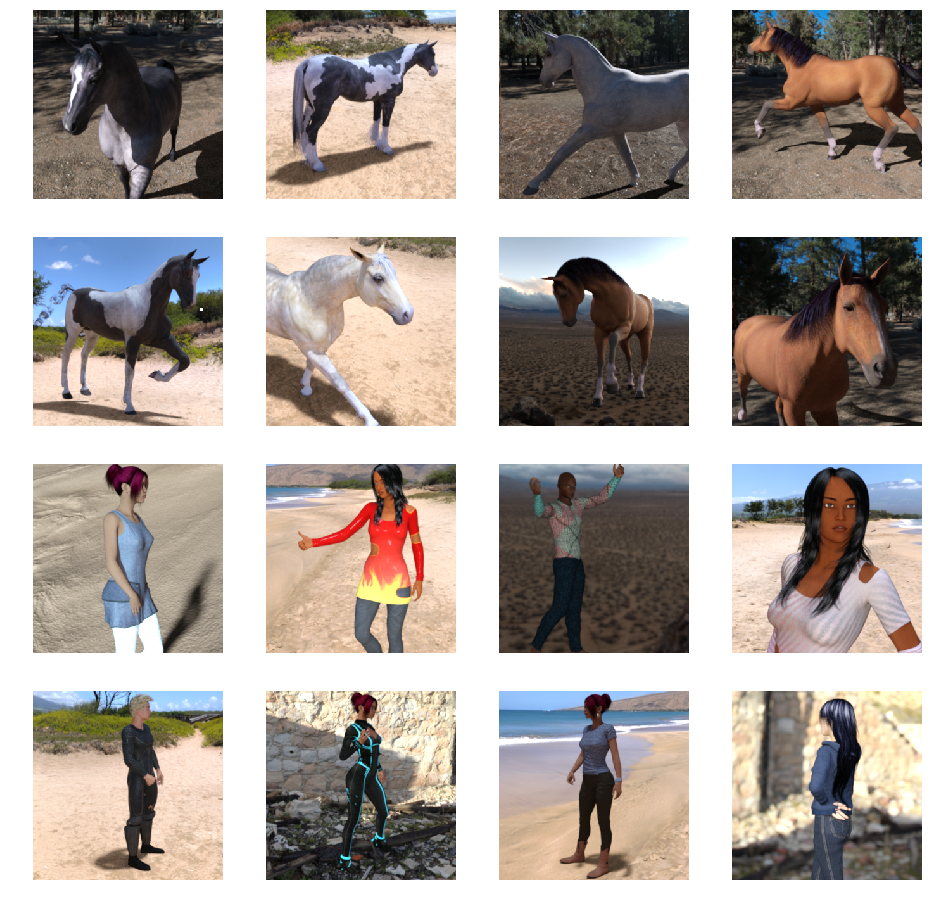

In [17]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows, ncols = 4, 4

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index=0

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_list[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_list[pic_index-8:pic_index]]

for i, img in enumerate(next_horse_pix+next_human_pix):
  plt.subplot(nrows, ncols, i+1)
  plt.imshow(mpimg.imread(img))
  plt.axis('off')
  image=mpimg.imread(img)
  
plt.show()
  

In [0]:
import tensorflow as tf

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 71, 71, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 35, 35, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 33, 33, 64)       

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss = 'binary_crossentropy', 
             optimizer = RMSprop(lr=0.001),
             metrics = ['accuracy']) 

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255)
validation_datagen = ImageDataGenerator(rescale = 1/255)

train_generator = train_datagen.flow_from_directory(
    '/tmp/horse-or-human',
    target_size = (300, 300),
    batch_size = 128,
    class_mode = 'binary'
)
    
validation_generator = validation_datagen.flow_from_directory(
    '/tmp/validation-horse-or-human',
    target_size = (300, 300),
    batch_size = 128,
    class_mode = 'binary'
)


Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [23]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 8,
    epochs = 15,
    validation_data = validation_generator,
    validation_steps=8,
    verbose = 1
)

Epoch 1/15
8/8 [==============================] - 113s 14s/step - loss: 0.8105 - acc: 0.5898 - val_loss: 0.7014 - val_acc: 0.5000
Epoch 2/15
8/8 [==============================] - 90s 11s/step - loss: 0.5973 - acc: 0.6925 - val_loss: 2.4721 - val_acc: 0.5273
Epoch 3/15
8/8 [==============================] - 99s 12s/step - loss: 0.6009 - acc: 0.7330 - val_loss: 0.6866 - val_acc: 0.5742
Epoch 4/15
8/8 [==============================] - 98s 12s/step - loss: 0.4883 - acc: 0.8142 - val_loss: 0.7278 - val_acc: 0.7852
Epoch 5/15
8/8 [==============================] - 102s 13s/step - loss: 0.1808 - acc: 0.9244 - val_loss: 0.7287 - val_acc: 0.8750
Epoch 6/15
8/8 [==============================] - 99s 12s/step - loss: 0.2046 - acc: 0.9132 - val_loss: 2.7454 - val_acc: 0.7070
Epoch 7/15
8/8 [==============================] - 107s 13s/step - loss: 0.1044 - acc: 0.9619 - val_loss: 1.6951 - val_acc: 0.8320
Epoch 8/15
8/8 [==============================] - 98s 12s/step - loss: 0.1575 - acc: 0.9444 - 

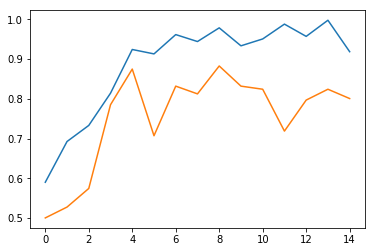

In [31]:
plt.plot(history.epoch, history.history['acc'])
plt.plot(history.epoch, history.history['val_acc'])

In [25]:
import numpy as np
print('Acc:', np.mean(history.history['acc']))
print('Val Acc:', np.mean(history.history['val_acc']))

Acc: 0.8866249
Val Acc: 0.7528646


In [29]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")
 

Saving DSCF1490.JPG to DSCF1490.JPG
[1.]
DSCF1490.JPG is a human
